In [1]:
from matplotlib import pyplot as plt
import numpy as np

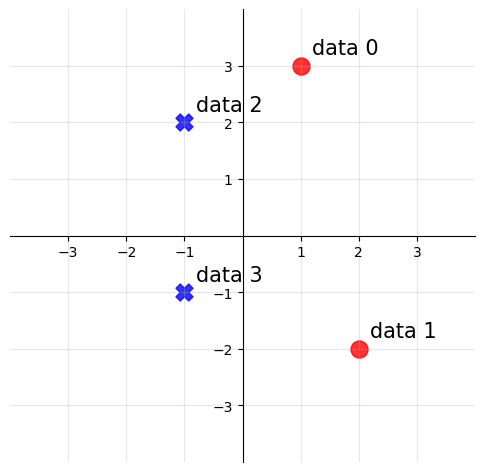

In [2]:
def plot_data(data, gt, w=None, dpi=100, show_id=True, view=4):
    # set figure
    plt.figure(figsize=(6,6), dpi=dpi)
    plt.xlim((-view,view))
    plt.ylim((-view,view))
    plt.grid(alpha=0.3)
    # set axes to center
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ticks = [i for i in range(-view+1, 0)] + [i for i in range(1,view)]
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    # add id
    if show_id:
        for i, d in enumerate(data):
            plt.text(d[0]+.2, d[1]+.2, 'data {}'.format(i), fontsize=15)

    if w is not None:
        # plot contour
        x = np.linspace(-view, view, 6)
        y = np.linspace(-view, view, 6)
        x, y = np.meshgrid(x, y)
        z = w[0] + w[1]*x + w[2]*y
        plt.contourf(x, y, z, 0, alpha=.5, cmap='bwr')
        # plot line
        x = np.linspace(-1.5*view, 1.5*view, 6)
        y = -(w[0] + w[1]*x)/w[2]
        plt.plot(x, y, c='k')
    
    # satter fonts
    color = {1:'red', -1:'blue'}
    mark = {1:'o', -1:'X'}
    # plot scatters
    for s, f in zip(data, gt):
        plt.scatter(s[0], s[1], s=150, c=color[f], marker=mark[f], alpha=.8)
    plt.show()


# pseudo data
data = [(1, 3), (2, -2), (-1, 2), (-1, -1)]
gt = [1, 1, -1, -1]
    
plot_data(data, gt)

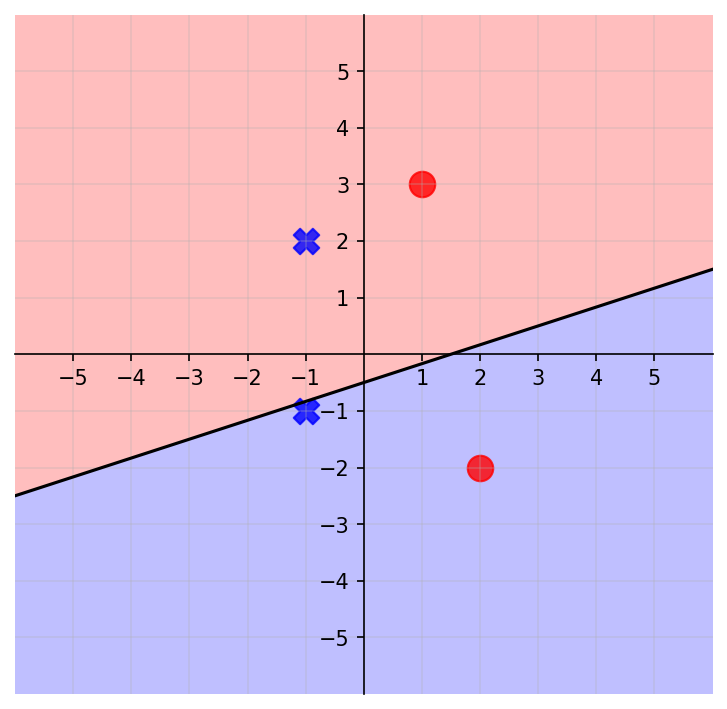

In [3]:
w = (1.5, -1, 3)
plot_data(data, gt, w, dpi=150, show_id=False, view=6)